### ДЗ 3
#### 1. Преобразовать текст в формат:
- [X] только леммы, без знаков препинания, все в нижнем регистре
- [X] каждое предложение на отдельной строчке

Поскольку нам нужен опять текст, хоть и в лемматизированной форме, то предыдущий json нам не поможет. Мы должны всё делать заново.
Откроем файл снова:

In [6]:
file_name = "../hw2/white_guardian.txt"  # Текстовый файл у нас в предыдущей директории
with open(file_name, encoding='utf-8') as f:
    text = f.read()

Разобьём на предложения - из лекции по морфологии мы знаем, как:

In [17]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)

Теперь нам надо всё перевести в нижний регистр, да выкинуть знаки препинания, а затем лемматизировать каждое предложение. Это можно сделать за один проход:

In [25]:
%%time
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import string

punct_chars = list(string.punctuation)
punct_chars.append("``")  # эти символы здорово мешаются
punct_chars.append("''")
punct_chars.append("...")
morph = MorphAnalyzer()

sentences_file_name = "sentences.txt"  # имя файла, куда мы запишем лемматизированный текст
sentences_list = ""  # строка, которую мы и запишем в файл
for sentence in sentences:
    tokenized_words = word_tokenize(sentence)  # токенизируем каждое предложение отдельно
    # Уберём знаки препинания, используя для этого более удобный код, чем в 2.1
    words = []
    for word in tokenized_words:
        if word not in punct_chars:
            words.append(word)
    # Возьмём начальную форму каждого слова и соберём в список
    normal_forms = []
    for word in words:
        parsed_word = morph.parse(word)
        normal_forms.append(parsed_word[0].normal_form)
    sentences_list += (' '.join(normal_forms))  # Добавляем в нашу суперстроку через пробелы
    sentences_list += ('\n')  # И не забываем символ переноса строки
with open(sentences_file_name, 'w', encoding='utf-8') as f:
    text = f.write(sentences_list)

Wall time: 25 s


#### 2. Обучить модель как показано в конспекте с параметрами
* размер вектора 300
* минимальное количество вхождений 5
* окно 5
* количество итераций 50

In [33]:
import logging
import gensim
from gensim.models import word2vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)  # сразу логгинг
data = gensim.models.word2vec.LineSentence(sentences_file_name)
model = gensim.models.Word2Vec(
    data,
    size=300,
    window=5,
    min_count=5,
    iter=50
)

2020-02-14 19:39:42,156 : INFO : collecting all words and their counts
2020-02-14 19:39:42,158 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-14 19:39:42,218 : INFO : collected 10096 word types from a corpus of 71164 raw words and 6435 sentences
2020-02-14 19:39:42,220 : INFO : Loading a fresh vocabulary
2020-02-14 19:39:42,229 : INFO : effective_min_count=5 retains 2259 unique words (22% of original 10096, drops 7837)
2020-02-14 19:39:42,230 : INFO : effective_min_count=5 leaves 58144 word corpus (81% of original 71164, drops 13020)
2020-02-14 19:39:42,243 : INFO : deleting the raw counts dictionary of 10096 items
2020-02-14 19:39:42,245 : INFO : sample=0.001 downsamples 48 most-common words
2020-02-14 19:39:42,247 : INFO : downsampling leaves estimated 45153 word corpus (77.7% of prior 58144)
2020-02-14 19:39:42,256 : INFO : estimated required memory for 2259 words and 300 dimensions: 6551100 bytes
2020-02-14 19:39:42,258 : INFO : resetting layer w

2020-02-14 19:39:44,828 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-14 19:39:44,831 : INFO : EPOCH - 18 : training on 71164 raw words (45043 effective words) took 0.1s, 483963 effective words/s
2020-02-14 19:39:44,912 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-14 19:39:44,919 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-14 19:39:44,930 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-14 19:39:44,931 : INFO : EPOCH - 19 : training on 71164 raw words (45110 effective words) took 0.1s, 469696 effective words/s
2020-02-14 19:39:45,011 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-14 19:39:45,018 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-14 19:39:45,027 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-14 19:39:45,029 : INFO : EPOCH - 20 : training on 71164 raw words (45221 effective word

2020-02-14 19:39:46,946 : INFO : EPOCH - 38 : training on 71164 raw words (45280 effective words) took 0.1s, 508235 effective words/s
2020-02-14 19:39:47,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-14 19:39:47,031 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-14 19:39:47,040 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-14 19:39:47,041 : INFO : EPOCH - 39 : training on 71164 raw words (45194 effective words) took 0.1s, 500849 effective words/s
2020-02-14 19:39:47,119 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-14 19:39:47,126 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-14 19:39:47,136 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-14 19:39:47,138 : INFO : EPOCH - 40 : training on 71164 raw words (45197 effective words) took 0.1s, 486475 effective words/s
2020-02-14 19:39:47,217 : INFO : worker thread finis

Вопрос: сколько получилось слов в этой модели?

In [38]:
print(len(model.wv.vocab))

2259


#### 4. Использовать следующие функции:
- [X] найти ближайшие 5 слов для а) животного б) абстрактного понятия в) имени главного героя г) прилагательных "хороший" и "плохой"
- [X] найти семантическую пропорцию
- [X] найти лишнее в списке слов

Для этого можно использовать функцию most_similar().

In [47]:
model.wv.most_similar('кит', topn=5)

[('трудно', 0.8237883448600769),
 ('мешать', 0.8083735108375549),
 ('жаль', 0.8076009154319763),
 ('плохо', 0.8027758598327637),
 ('точно', 0.7961563467979431)]

In [49]:
model.wv.most_similar('революция', topn=5)

[('война', 0.8328709602355957),
 ('положение', 0.8285034894943237),
 ('трудный', 0.8144578337669373),
 ('немец', 0.8124399185180664),
 ('большевик', 0.8020069599151611)]

In [50]:
model.wv.most_similar('николка', topn=5)

[('турбин', 0.6811341047286987),
 ('анюта', 0.6066335439682007),
 ('елена', 0.5858662128448486),
 ('он', 0.5832560062408447),
 ('она', 0.5748130083084106)]

In [51]:
model.wv.most_similar('хороший', topn=5)

[('положение', 0.793994128704071),
 ('пожалуй', 0.7548615336418152),
 ('уж', 0.7497487664222717),
 ('трудный', 0.7481001615524292),
 ('право', 0.7423897981643677)]

In [52]:
model.wv.most_similar('плохой', topn=5)

[('болезнь', 0.7955225110054016),
 ('встречать', 0.7889875769615173),
 ('петербургский', 0.7772526144981384),
 ('гражданин', 0.7705717086791992),
 ('ровный', 0.7629084587097168)]

In [61]:
model.wv.most_similar(positive=["россия", "украина"], negative=["петлюровец"], topn=1)

[('менее', 0.7551277875900269)]

In [65]:
model.wv.doesnt_match("кит кот студзинский лошадь".split(' '))

'лошадь'

#### 4. Попробуйте сделать визуализацию с помощью PCA (один из двух на выбор)
- [ ] попробуйте на именах героев (4+ имен, можно брать имя и фамилию героя отдельно, это даже интересно): это отражает их отношения / их характеры?
- [ ] попробуйте на каких-то названиях предметов или животных: насколько это похоже на правду?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


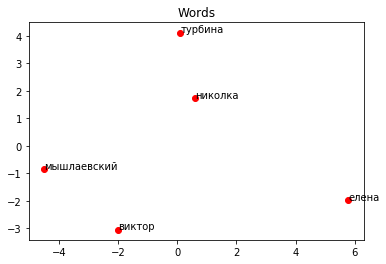

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
words = ['николка', 'виктор', 'елена', 'турбина', 'мышлаевский']
X = model[words]

pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Странно, но все как-то в разных углах, даже "елена" и "турбина".

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


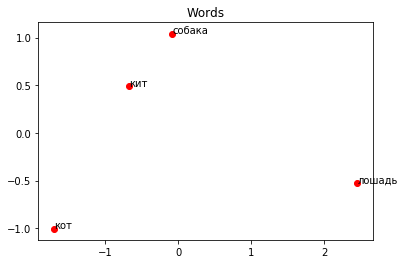

In [70]:
words = ['кит', 'кот', 'лошадь', 'собака']
X = model[words]

pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### 5. Возьмите предложение и замените все слова (которые не являются служебными) на ближайшие по векторам


In [89]:
sentence = 'надо всё-таки вертеть голова это же не стих'
from nltk.corpus import stopwords
words_no_stopwords = []
words = word_tokenize(sentence)
for word in words:
    if word not in stopwords.words('russian'):
        words_no_stopwords.append(word)

def most_similar(word):
    return model.wv.most_similar(word, topn=1)

for word in words_no_stopwords:
    print(model.wv.most_similar(word, topn=1)[0][0])

хотеть
вдохновенно
ужас
равно
миф
